In [34]:
##Count each word and letters in text


wordsoutput = open('wordsoutput.txt' , 'w')
lettersoutput = open('lettersoutput.txt', 'w')

words = {}
letters = {}
with open('europarl-v7.hu-en.hu' , 'r') as input_file:
    for line in input_file:
        wordsInLine = line.split()
        for word in wordsInLine:
            for letter in word:
                if letter in letters.keys():
                    letters[letter] += 1
                else:
                    letters[letter] = 1
            if word in words.keys():
                words[word] += 1
            else:
                words[word] = 1

#Writing output into files
for i, j in sorted(words.items(), key=lambda item: (item[1] , item[0]), reverse=True):
    wordsoutput.write("{0} \t {1} \n".format(i,j))
for k, l in sorted(letters.items(), key=lambda item: (item[1], item[0]), reverse=True):
    lettersoutput.write("{0} \t {1} \n".format(k,l))


11895737


In [5]:
#Same as last, with collections.Counter

from collections import Counter

wordsoutput = open('wordsoutput2.txt' , 'w')
lettersoutput = open('lettersoutput2.txt' , 'w')

wordCounter = Counter()
letterCounter = Counter()

with open('europarl-v7.hu-en.hu' , 'r') as input_file:
    for word in input_file.read().split():
            wordCounter[word] += 1
            for letter in word:
                letterCounter[letter] += 1
        
for item in letterCounter.most_common():
    lettersoutput.write("{0} \t {1} \n".format(item[0] , item[1]))
    
for item in wordCounter.most_common():
    wordsoutput.write("{0} \t {1} \n".format(item[0] , item[1]))





In [35]:
import string
sum=0
with open('europarl-v7.hu-en.hu' , 'r') as input_file:
    with open('lowercase_output.txt' , 'w') as output_file: 
        for word in input_file.read():
            for p in string.punctuation:
                word = word.replace(p,"")
            output_file.write(word.lower())
            sum += 1
print(sum)

95533291


In [10]:
## Számolás futtatása a kisbetűsített szövegen
from collections import Counter




word_counter_low = Counter()
letter_counter_low = Counter()

with open('lowercase_output.txt' , 'r') as input_file:
    for word in input_file.read().split():
        if word.isdigit():
            word_counter_low["__NUM__"] += 1
        else:
            word_counter_low[word] += 1
            for letter in word:
                letter_counter_low[letter] += 1
        
with open('lower_letters_stats.txt' , 'w') as lettersoutput:
    for item in letter_counter_low.most_common():
        lettersoutput.write("{0} \t {1} \n".format(item[0] , item[1]))

        
with open('lower_words_stats.txt' , 'w') as wordsoutput:
    for item in word_counter_low.most_common():
        wordsoutput.write("{0} \t {1} \n".format(item[0] , item[1]))

In [68]:
##Ritka szavak lecserélése RARE-re



def change_rare_words(filename, rare_border):
    wordCounter = {}

    with open(filename , 'r') as input_file:
        for word in input_file.read().split():
            if word.isdigit():
                if "__NUM__" in wordCounter.keys():
                    wordCounter["__NUM__"] += 1
                else:
                    wordCounter["__NUM__"] = 1
            else:
                if word in wordCounter.keys():
                    wordCounter[word] += 1
                else: 
                    wordCounter[word] = 1
    
    with open(filename, 'r') as input_file:
        with open('teszt.txt' , 'w') as output_file: 
            for line in input_file:
                wordInLine = line.split()
                for word in wordInLine:
                    if word in wordCounter.keys():                    
                        if wordCounter[word] < rare_border:
                            output_file.write(' __RARE__ ' + ' ')
                        else: 
                            output_file.write(word + ' ')
                output_file.write('\n')

change_rare_words('lowercase_output.txt' , 40)

0
3609718
3969381
4164977
4293413
4386274
4458242
4515920
4563433
4603444
4637626
4667180
4693228
4716351
4736891
4755408
4772578
4787578
4801868
4814368
4826868


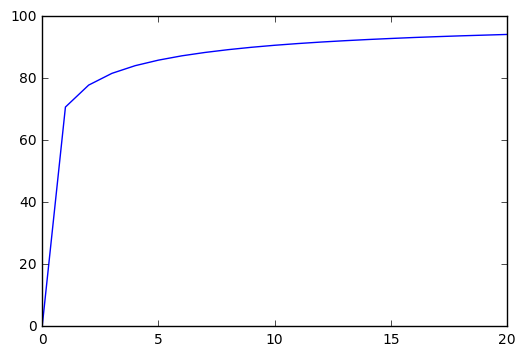

In [67]:
## Az első x szó mennyire fedi le az eredeti szöveget? 
%matplotlib inline

import string
import matplotlib.pyplot as plt

def check_dict_ratio(dict_size):
    frequent_words = {}
    numOfFrequent = 0
    numOfWords = 0
    check_number = 0
    sum = 0
    for item in word_counter_low.most_common():
        if check_number < dict_size:
            frequent_words[item[0]] = item[1] 
            check_number += 1
            sum += item[1]
        else:
            break;
    
    print(sum)
    with open('lowercase_output.txt' , 'r') as input_file:
        for word in input_file.read().split():
            if word in frequent_words.keys():
                numOfFrequent += 1
                numOfWords += 1
            else:
                numOfWords += 1
    
#    print('Ratio: ' + str(numOfFrequent) + ' / ' + str(numOfWords))
    ratio = numOfFrequent / numOfWords
    ratio *= 100
#    print(str(ratio) + '%' + ' - At the dict_size of: ' + str(dict_size) + '\n\n' )
    return ratio


frq_words = 0
freq_percent = {}

while True: 
    if frq_words > 50000: 
        break
    else:
        freq_percent[frq_words] = check_dict_ratio(frq_words)
        frq_words += 2500

#x = freq_percent.keys()
#y = freq_percent.values()
#plt.fill(x,y,'r')
#plt.grid(true)
#plt.show()

lists = sorted(freq_percent.values())
plt.plot(lists)
plt.show()

#plt.bar(range(len(freq_percent)), freq_percent.values(), align='center')
#plt.xticks(range(len(freq_percent)), freq_percent.keys())

#plt.show()